## Covid Captone project stage 1

**Mounting the Drive**

Mounting the google drive to access the files, and connect your google collab files to google drive, since all the files are in the google drive and then you can access them.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [13]:
!pip install tensorflow==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 120.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 117.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 72.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: t

**Importing Libararies**

Importing all the libraries needed for exploring the dataset.

In [3]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


#Stage 1: EDA

Putting the data in the file into data frames and then it generates data paths with labes.

In [4]:
#Read Data and Store it in a dataframe
# Generate data paths with labels
#Use your own dataset path in Google drive
data_dir = '/content/gdrive/MyDrive/Capstone_project_u3269348_Mir_Hameedullah_Ibrahimi/COVID_IEEE_dataset'
filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)

**Observation:**
By doing so now the data has two columns which is file paths and labels.

In [5]:
#EDA Q1:How is the data distribution?
df.head(5)

,filepaths,labels
0,/content/gdrive/MyDrive/Capstone_project_u3269...,covid
1,/content/gdrive/MyDrive/Capstone_project_u3269...,covid
2,/content/gdrive/MyDrive/Capstone_project_u3269...,covid
3,/content/gdrive/MyDrive/Capstone_project_u3269...,covid
4,/content/gdrive/MyDrive/Capstone_project_u3269...,covid


In [ ]:
df.tail(5)

,filepaths,labels
1818,/content/gdrive/MyDrive/Capstone_project_u3269...,normal
1819,/content/gdrive/MyDrive/Capstone_project_u3269...,normal
1820,/content/gdrive/MyDrive/Capstone_project_u3269...,normal
1821,/content/gdrive/MyDrive/Capstone_project_u3269...,normal
1822,/content/gdrive/MyDrive/Capstone_project_u3269...,normal


**Observation**

This block of code is use to explore the data to determine the number of the imagess in the data set and at the first on we have the top 5 and then we have bottom 5 in the next part.

In [6]:
#EDA Q2:Are there labels available for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823 entries, 0 to 1822
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  1823 non-null   object
 1   labels     1823 non-null   object
dtypes: object(2)
memory usage: 28.6+ KB


**Observation**

In the second question, we have used the info function to find information about data frames to check the amount of data and whether there are any null objects or not. In this case, we have a total of 1823 files, 2 columns, and no null objects.

In [7]:
#EDA 3: How much data can be used for training, validation and testing?
#Split dataframe into train, valid, and test
# train dataframe
train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123)

# valid and test dataframe
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.6, shuffle= True, random_state= 123)

**Observation**

In the third question, we split the data into three categories.


*   In the first split, we put 80% of the data into training and then store the rest 20% in the dummy, and we also have shuffle True so that it will shuffle the files before splitting.
*   Then we use the 20% remaining and then split it further into valid and test dataframes, of which 60% goes to the valid data frame and the rest goes to the test data frame.



In [8]:
# EDA Q4: Can we visualise the data?
#Create image data generator
# crobed image size
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Recommended : use custom function for test data batch size, else we can use normal batch size.
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

# This function which will be used in image data generator for data augmentation, it just take the image and return it again.
def scalar(img):
    return img

tr_gen = ImageDataGenerator(preprocessing_function= scalar)
ts_gen = ImageDataGenerator(preprocessing_function= scalar)

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

# Note: we will use custom test_batch_size, and make shuffle= false
test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= test_batch_size)

Found 1366 validated image filenames belonging to 3 classes.
Found 205 validated image filenames belonging to 3 classes.
Found 137 validated image filenames belonging to 3 classes.


**Observations**

here are my observation from the fourth EDA question.

*   In this first part, the batch size of the images is determined by how many images should be generated, their size, the number of RGB colour channels used, and then the image shape is determined.
* The next part of the code is used to calculate a custom batch size for the test batch size based on the length of the test set.
*   A scalar is used to return the image unchanged.
* An image generator has been used to process and load the images, and also, as for the train and valid data sets, the shuffle is true, so the images will be shuffled prior to loading, but as for the test data set, the shuffle is false, which means the data would not be shuffled.





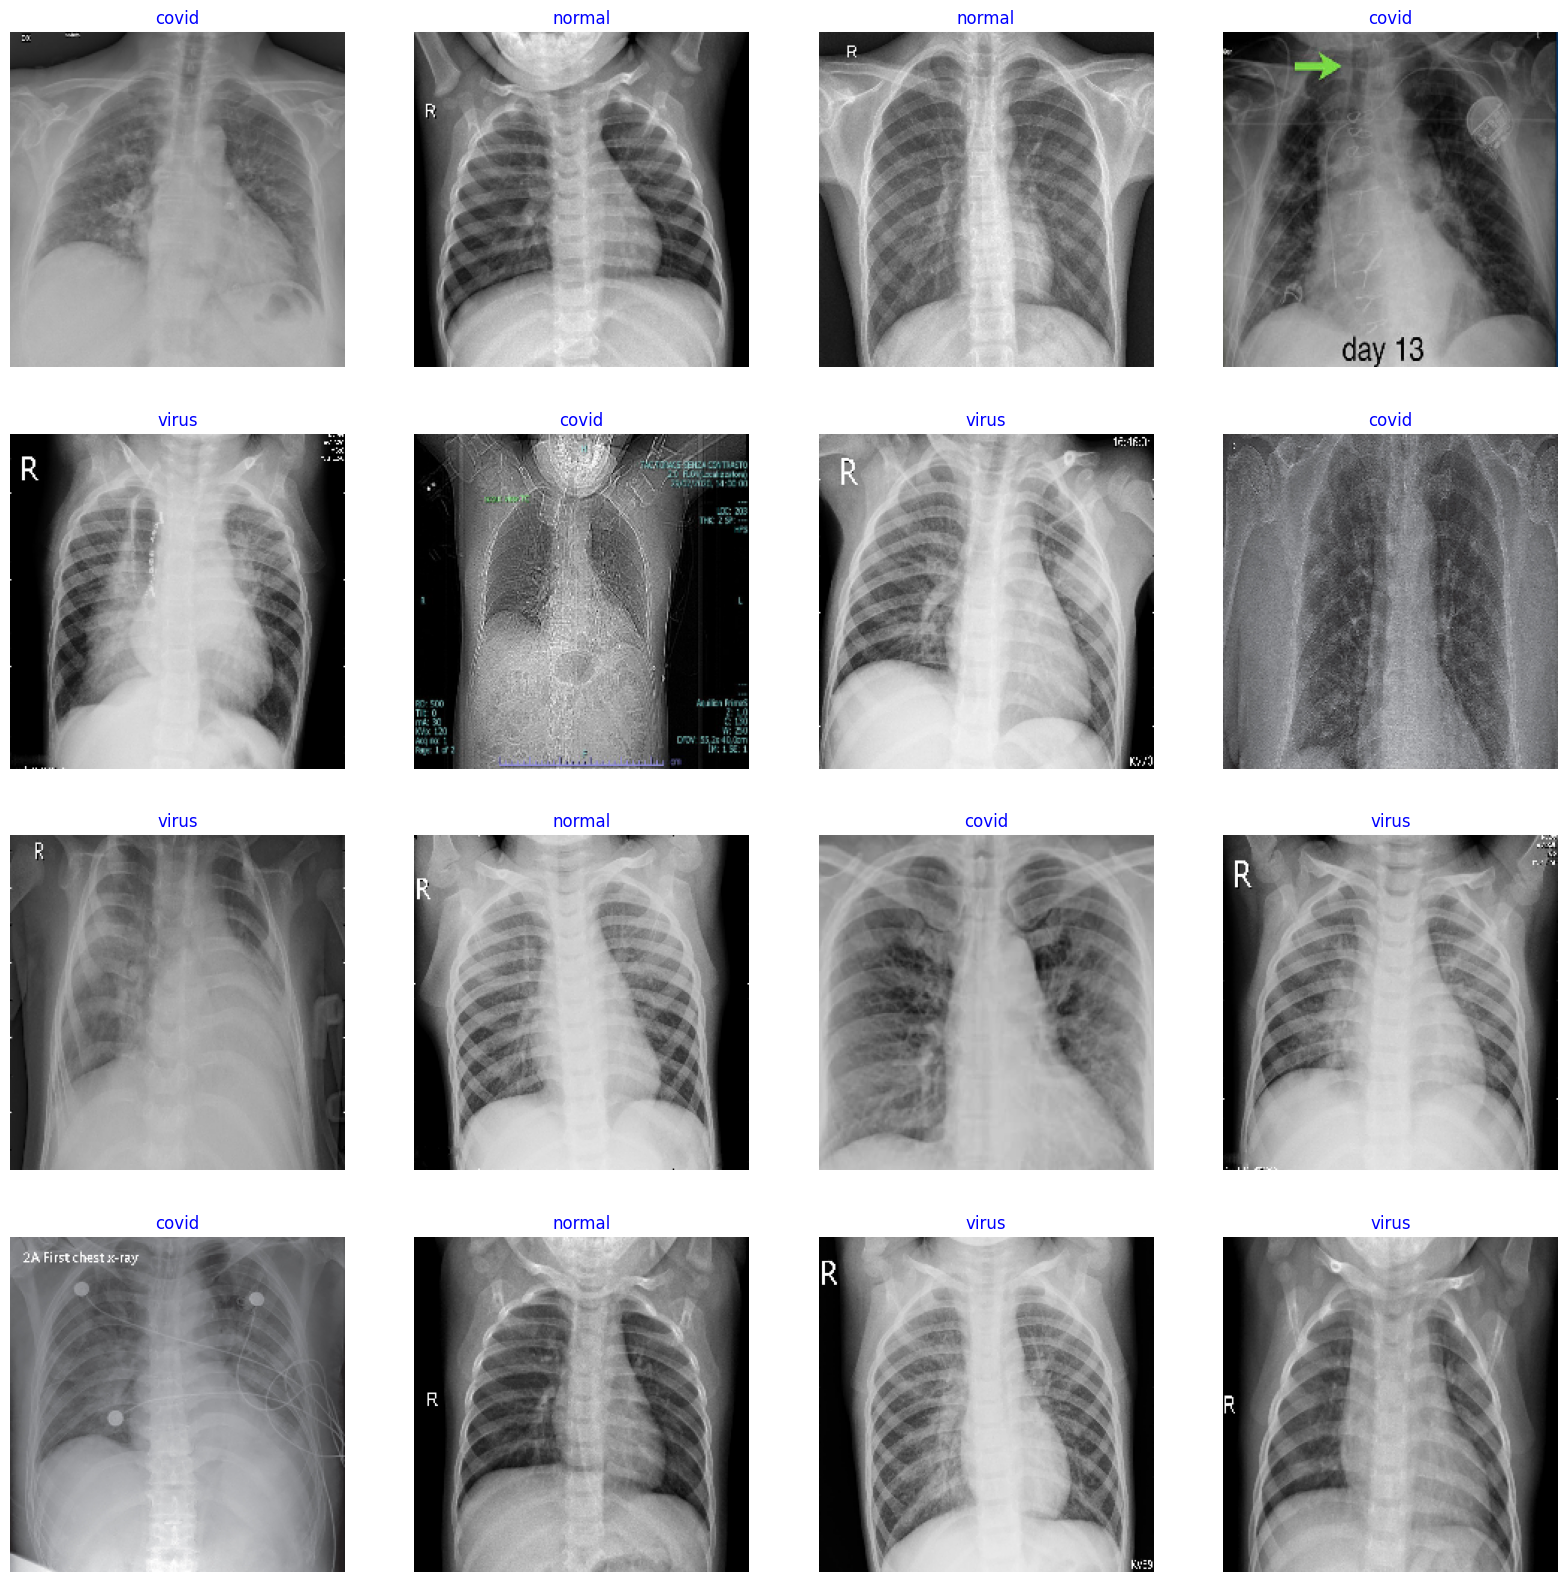

In [9]:
#EDA Q5: How does the samples from the training subset look like ?

g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

**Observations**

In the fifth question, we will focus on plotting the images for a trial view to see how the training subset looks like.

* We first define a dictionary and then its classes, then we get a batch from the training generator.
* Then a loop iterates over the batch and takes 16 samples, which are then plotted for visualisation with their specific class names.



(<Axes: title={'center': 'Image with Corners\n Normal x-ray'}>,
 Text(0.5, 1.0, 'Image with Corners\n Normal x-ray'))

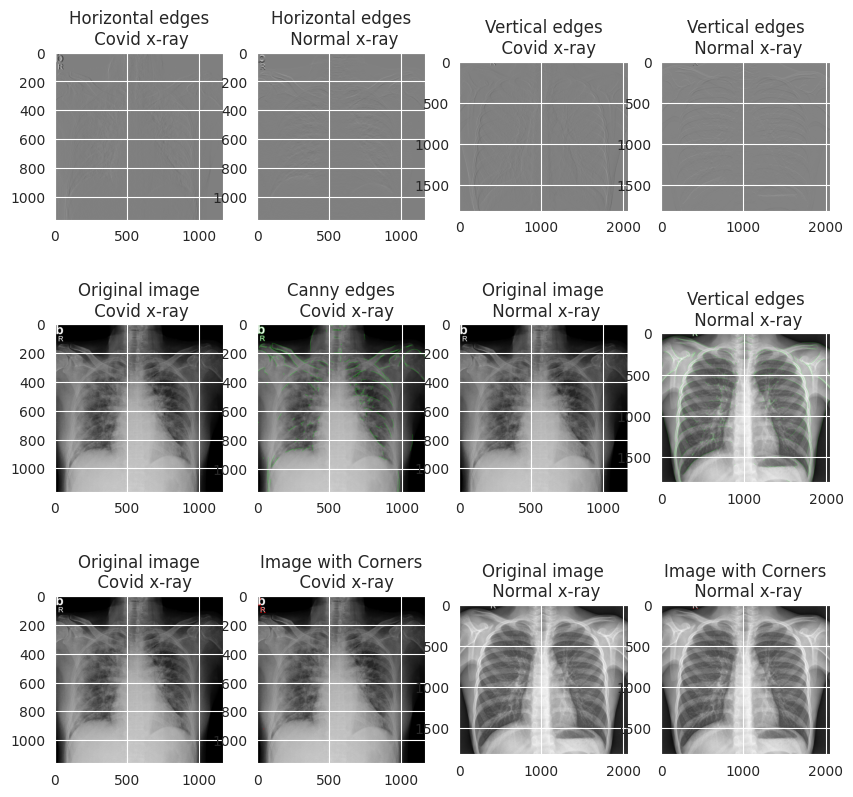

In [27]:
################################################################
#Q6: How discriminative are the salient features such as edges and #corners for images corresponding to each class
#Conversion to Gray scale image needed for extracting edges and corners
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
%matplotlib inline
img_path_1 = '/content/gdrive/MyDrive/Capstone_project_u3269348_Mir_Hameedullah_Ibrahimi/COVID_IEEE_dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/content/gdrive/MyDrive/Capstone_project_u3269348_Mir_Hameedullah_Ibrahimi/COVID_IEEE_dataset/normal/IM-0007-0001.jpeg'
img_2 = cv2.imread(img_path_2)
#Sobel edge detector
#edge detector works on gray scale images
sobel_img_1=cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
sobel_img_2=cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)
sobelx_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,1,0,ksize=9)
sobely_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,0,1,ksize=9)
sobelx_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,1,0,ksize=9)
sobely_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,0,1,ksize=9)
#Canny edge detector
#threshold selection
th1=30
th2=60
# Canny recommends threshold 2 is 3 times threshold 1
# you could try experimenting with this...
d=3
# gaussian blur
# this takes pixels in edgeresult where edge non-zero and colours them bright green
edgeresult_1=img_1.copy()
edgeresult_1 = cv2.GaussianBlur(edgeresult_1, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
gray_1 = cv2.cvtColor(edgeresult_1, cv2.COLOR_BGR2GRAY)
edge_1 = cv2.Canny(gray_1, th1, th2)
edgeresult_1[edge_1 != 0] = (0, 255, 0)
edgeresult_2=img_2.copy()
edgeresult_2 = cv2.GaussianBlur(edgeresult_2, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
gray_2 = cv2.cvtColor(edgeresult_2, cv2.COLOR_BGR2GRAY)
edge_2 = cv2.Canny(gray_2, th1, th2)
edgeresult_2[edge_2 != 0] = (0, 255, 0)
#Corner detector
#detecting corners for  image_1
harris_1=img_1.copy()
#greyscale it
gray = cv2.cvtColor(harris_1,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
blocksize=4 #
kernel_size=3 # sobel kernel: must be odd and fairly small
# run the harris corner detector
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # parameters are blocksize, Sobel parameter and Harris threshold
#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#we then plot these on the input image for visualisation purposes, using bright red
harris_1[dst>0.01*dst.max()]=[0,0,255]
#detecting corners for image_2
harris_2=img_2.copy()
#greyscale it
gray = cv2.cvtColor(harris_2,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
blocksize=4 #
kernel_size=3 # sobel kernel: must be odd and fairly small
# run the harris corner detector
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # parameters are blocksize, Sobel parameter and Harris threshold
#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#we then plot these on the input image for visualisation purposes, using bright red
harris_2[dst>0.01*dst.max()]=[0,0,255]

#Visualisng Edges and Corners
plt.figure(figsize=(10,10))
#Visualising Sobel Edges
plt.subplot(341), plt.imshow(sobelx_img_1, cmap = 'gray'),plt.title('Horizontal edges\n Covid x-ray')
plt.subplot(342), plt.imshow(sobely_img_1, cmap = 'gray'),plt.title('Horizontal edges\n Normal x-ray')
plt.subplot(343), plt.imshow(sobelx_img_2, cmap = 'gray'),plt.title('Vertical edges\n  Covid x-ray')
plt.subplot(344), plt.imshow(sobely_img_2, cmap = 'gray'),plt.title('Vertical edges\n Normal x-ray')
#Visualising Canny Edges
plt.subplot(345), plt.imshow(img_1),plt.title('Original image\n Covid x-ray')
plt.subplot(346), plt.imshow(edgeresult_1, cmap = 'gray'),plt.title('Canny edges\n  Covid x-ray')
plt.subplot(347), plt.imshow(img_1),plt.title('Original image\n Normal x-ray')
plt.subplot(348), plt.imshow(edgeresult_2, cmap = 'gray'),plt.title('Vertical edges\n Normal x-ray')
#Visualising Corners
plt.subplot(349), plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)),plt.title('Original image\n  Covid x-ray')
plt.subplot(3,4,10), plt.imshow(cv2.cvtColor(harris_1, cv2.COLOR_BGR2RGB)),plt.title('Image with Corners\n  Covid x-ray')
plt.subplot(3,4,11), plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)),plt.title('Original image\n Normal x-ray')
plt.subplot(3,4,12), plt.imshow(cv2.cvtColor(harris_2, cv2.COLOR_BGR2RGB)),plt.title('Image with Corners\n Normal x-ray')
#################################################################


**Observations**

In this question, we will try to explore the difference in the edges and corners of two images belonging to two different classes. Here are my observations.
* We used edge detectors and also different colouring to find the vertical and horizontal edges of the image to see if we could find differences in the edges. When it comes to two different classes, for this method, we used Sobel edge detectors and Canny edge detectors, and we can see some differences.
* Then we used the Harris corner detection tools to find the corners in the images and plot them so that the differences would be visible.
* Matplotlib was used to plot the images for a grid view for better visualisation of the images.

The libraries used are open. cv2, numpy, and matplotlib.




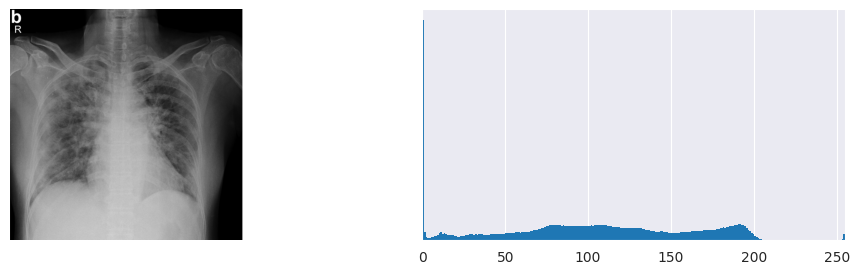

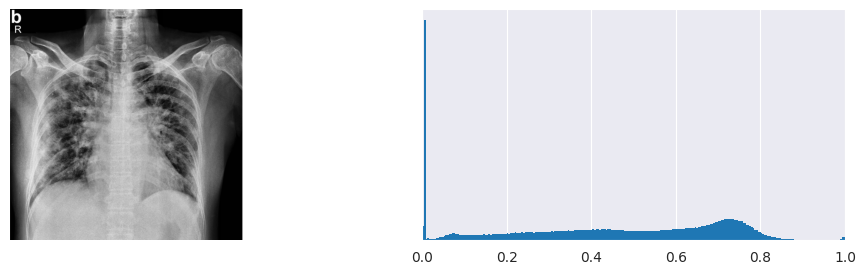

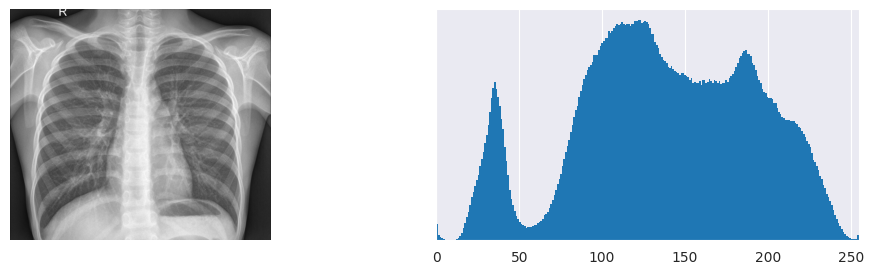

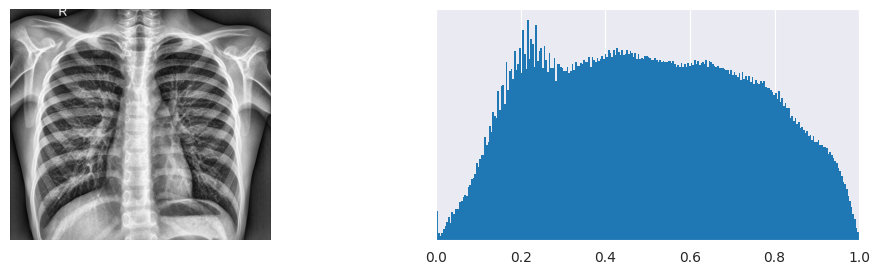

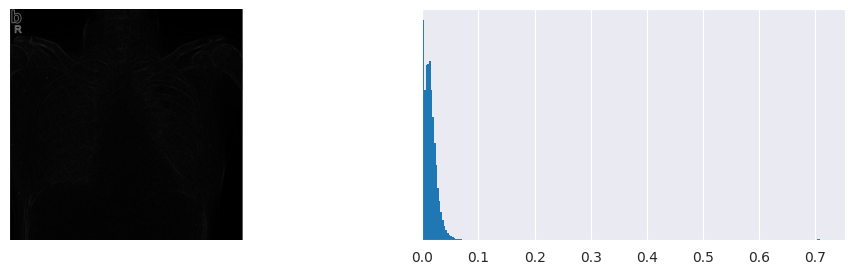

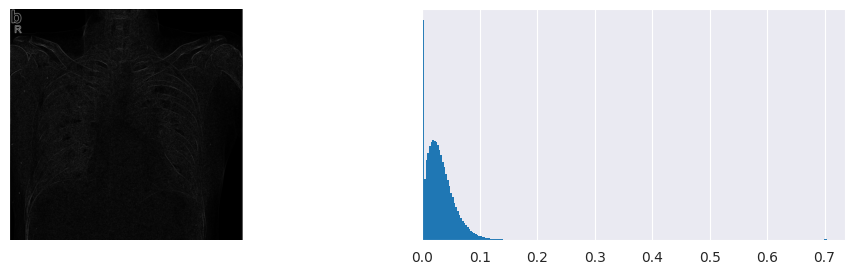

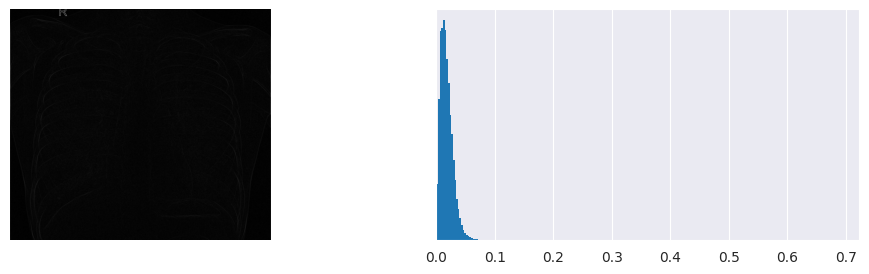

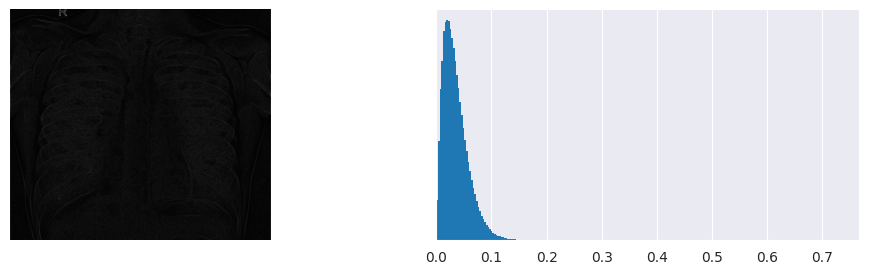

In [28]:
#Q7 EDA: How discriminative are the images from different categories in terms of illumination and lighting artefacts
# i.e. what is the impact of camera effects/exposure of an image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
import skimage.exposure as skie
%matplotlib inline




img_path_1 = '/content/gdrive/MyDrive/Capstone_project_u3269348_Mir_Hameedullah_Ibrahimi/COVID_IEEE_dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/content/gdrive/MyDrive/Capstone_project_u3269348_Mir_Hameedullah_Ibrahimi/COVID_IEEE_dataset/normal/IM-0007-0001.jpeg'
img_2 = cv2.imread(img_path_2)

def show(img):
    # Display the image.
    fig, (ax1, ax2) = plt.subplots(1, 2,
                                   figsize=(12, 3))
    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.set_axis_off()

    # Display the histogram.
    ax2.hist(img.ravel(), lw=0, bins=256)
    ax2.set_xlim(0, img.max())
    ax2.set_yticks([])
    plt.show()
show(img_1)
# adaptive histogram equalisation
show(skie.equalize_adapthist(img_1))

show(img_2)
# adaptive histogram equalisation
show(skie.equalize_adapthist(img_2))

#class 1 image
img = skic.rgb2gray(img_1)
sobimg_nheq= skif.sobel(img)
show(sobimg_nheq)
img = skic.rgb2gray(skie.equalize_adapthist(img_1))
sobimg_heq_1 = skif.sobel(img)
show(sobimg_heq_1)
#class 2 image
img = skic.rgb2gray(img_2)
sobimg_nheq= skif.sobel(img)
show(sobimg_nheq)
img = skic.rgb2gray(skie.equalize_adapthist(img_2))
sobimg_heq_2 = skif.sobel(img)
show(sobimg_heq_2)


**Observation**

In the seventh question, I explored the difference that lighting brings to the images of the different classes. This is to improve how the model can identify images even if they differ in lighting. So in this question, I explored different contrasts, and we can see as they increase and completely go dark. This is to enable the model to be able to differentiate the scans regardless of the lighting.